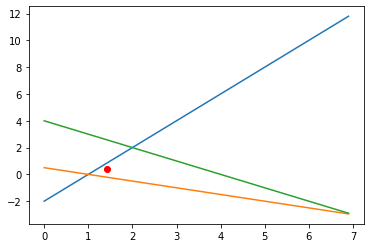

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Sistema de ecuaciones

#2x-y=2
#x+2y=1
#x+y=4

A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([[2], [1], [4]])

#aAx=ab donde a es la transpuesta de A

aA = np.dot(A.T,A)
ab = A.T @ b

sol = np.linalg.solve(aA,ab)

x1 = np.array(range(70))*0.1
y1 = np.zeros(len(x1))
y2 = np.zeros(len(x1))
y3 = np.zeros(len(x1))
for i in range(len(x1)):
    y1[i] = 2*x1[i] - 2
    y2[i] = (1 - x1[i])/2
    y3[i] = 4 - x1[i]
    
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.scatter(sol[0],sol[1],color='r')


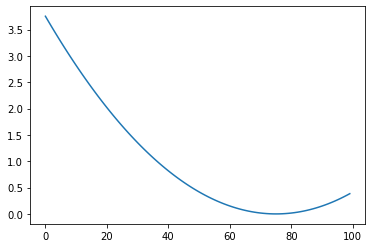

In [38]:
def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    return y
X = sp.Symbol('x',real=True)

def GetChi2(x,y,sigma,p,reducido=True):
    
    df  = (4 -  2 - 1)
    
    if not reducido:
        return np.sum( ( (y - GetModel(x,p))/sigma  )**2 )
    else:
        return np.sum( ( (y - GetModel(x,p))/sigma  )**2 )/df

sigma = np.random.uniform(1,5,2)
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
vector = []

for i in range(len(x)):
    Chi2 = GetChi2(x[i],y[i],sigma,sol)
    vector.append(Chi2)

plt.plot(np.arange(0,100,1),vector)